## PROJECT 1

1/3/2024

Brandon Welsh

The goal of this is to explore a covid-19 dataset to determine the relationship between a patient having cardiovascular disease, obesity, and/or tobacco usage and each of these independent variable's effects on the dependent variables of hospitalization, intubation, ICU admission, and death.

Variables key (for reference):

sex: 1 for female and 2 for male.

age: of the patient.

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different

degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

pneumonia: whether the patient already have air sacs inflammation or not.

pregnancy: whether the patient is pregnant or not.

diabetes: whether the patient has diabetes or not.

copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

asthma: whether the patient has asthma or not.

inmsupr: whether the patient is immunosuppressed or not.

hypertension: whether the patient has hypertension or not.

cardiovascular: whether the patient has heart or blood vessels related disease.

renal chronic: whether the patient has chronic renal disease or not.

other disease: whether the patient has other disease or not.

obesity: whether the patient is obese or not.

tobacco: whether the patient is a tobacco user.

usmr: Indicates whether the patient treated medical units of the first, second or third level.

medical unit: type of institution of the National Health System that provided the care.

intubed: whether the patient was connected to the ventilator.

icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

Source of dataset key: https://www.kaggle.com/datasets/meirnizri/covid19-dataset?rvi=1

--------------------------------------------------------------------------------------------------------------------------------
## IMPORT LIBRARIES

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## LOAD IN THE DATA

In [27]:
df = pd.read_csv('resources/Covid Data.csv')
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


---------------------------------------------------------------------------------------------------------------------
## INITIAL DATA EXPLORATION

In [28]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

-----------------------------------------------------------------------------------------------------
## PROJECT SCOPE REMINDER

I am looking at the following INDEPENDENT VARIABLES:

    cardiovascular - if they have cardiovascular disease (yes or no)

    obesity - if they are fat (yes or no)

    tobacco - if they smoke (yes or no)

With these, I am seeing how they affect the following DEPENDENT VARIABLES:

    patient type - 1 if they went home, 2 if they were hospitalized

    icu - whether they went into the ICU (yes or no)

    death - make new column using data from date died, make it boolean
    
    intubed - ventilator (yes or no)

-----------------------------------------------------------------------------------------------------

## DATA CLEANING

In [30]:
# I want to trim this dataframe so I only look at columns relevant to this project.
# I can create a list of columns I wish to keep:
columns_all = ['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE', 'CARDIOVASCULAR', 'OBESITY', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']

# I may also want ones that keep only specific independent variables:
# Edit after finishing the project: I was incorrect
#columns_cardio = ['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE', 'CARDIOVASCULAR', 'CLASIFFICATION_FINAL', 'ICU']
#columns_obesity = ['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE', 'OBESITY', 'CLASIFFICATION_FINAL', 'ICU']
#columns_tobacco = ['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']

# Finally, I need to store all of these as their own, well-named dataframes:
df_trimmed_all = df[columns_all]

# I can quickly check that each of these were done correctly:
print(df_trimmed_all.columns)

Index(['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE',
       'CARDIOVASCULAR', 'OBESITY', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [31]:
# I want to be able to look at these columns and figure out what the data looks like:
for column in df_trimmed_all.columns:
    print(df_trimmed_all[column].value_counts())
    print("\n")

MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64


SEX
1    525064
2    523511
Name: count, dtype: int64


PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64


DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64


INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64


AGE
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64


CARDIOVASCULAR
2     1024730
1       20769
98       3076
Name: count, dtype: int64


OBESITY
2     885727
1    

In [32]:
# I want to create a new column called DEAD. If date = 99-99-9999, then alive, else dead.
# can do this with a lambda function:
df_trimmed_all['DEAD'] = df_trimmed_all['DATE_DIED'].apply(
    lambda x: 'NO' if x == '9999-99-99' else 'YES')
df_trimmed_all

C:\Users\brand\AppData\Local\Temp\ipykernel_107324\4078654039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed_all['DEAD'] = df_trimmed_all['DATE_DIED'].apply(


,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,AGE,CARDIOVASCULAR,OBESITY,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,1,1,1,03/05/2020,97,65,2,2,2,3,97,YES
1,1,2,1,03/06/2020,97,72,2,1,2,5,97,YES
2,1,2,2,09/06/2020,1,55,2,2,2,3,2,YES
3,1,1,1,12/06/2020,97,53,2,2,2,7,97,YES
4,1,2,1,21/06/2020,97,68,2,2,2,3,97,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,13,2,1,9999-99-99,97,40,2,2,2,7,97,NO
1048571,13,2,2,9999-99-99,2,51,2,2,2,7,2,NO
1048572,13,2,1,9999-99-99,97,55,2,2,2,7,97,NO
1048573,13,2,1,9999-99-99,97,28,2,2,2,7,97,NO


In [33]:
# I like that DEAD column. I want to do that to all of the columns.
# I want to now recode all the junk data (I do not want to analyze 1s and 2s, I want to analyze yes or no)

# I want to keep the original dataframe intact for reference (and to make sure I recoded it right):
df_recoded = df_trimmed_all

# I can use the map function to (CAREFULLY) change variables (referring to the key I put in the markdown at the top of this thing):
df_recoded.loc[:, 'SEX'] = df_recoded['SEX'].map({1: 'FEMALE', 2: 'MALE'})
df_recoded.loc[:, 'PATIENT_TYPE'] = df_recoded['PATIENT_TYPE'].map({1: 'SENT HOME', 2: 'HOSPITALIZED'})
df_recoded.loc[:, 'INTUBED'] = df_recoded['INTUBED'].map({1: 'YES', 2: 'NO'})
df_recoded.loc[:, 'CARDIOVASCULAR'] = df_recoded['CARDIOVASCULAR'].map({1: 'YES', 2: 'NO'})
df_recoded.loc[:, 'OBESITY'] = df_recoded['OBESITY'].map({1: 'YES', 2: 'NO'})
df_recoded.loc[:, 'TOBACCO'] = df_recoded['TOBACCO'].map({1: 'YES', 2: 'NO'})
df_recoded.loc[:, 'ICU'] = df_recoded['ICU'].map({1: 'YES', 2: 'NO'})

# This last one is tricky. Anything 4 or higher means negative or inconclusive covid test.
# As for what 1-3 means, it is varying degrees of covid but idk if 3 is severe or if 1 is.
# For now, I will call them COVID-1 thru COVID-3 until I can determine which are which.
# NOTE I still don't know and don't want to guess, they will remain Covid-1 thru Covid-3
df_recoded.loc[:, 'CLASIFFICATION_FINAL'] = df_recoded['CLASIFFICATION_FINAL'].map(
    {1: 'COVID-1',
      2: 'COVID-2',
        3: 'COVID-3',
          4: 'NOT COVID',
            5: 'NOT COVID',
              6: 'NOT COVID',
                7: 'NOT COVID'})

#I am leaving MEDICAL_UNIT alone for now because I don't know what the differences are.
#Won't use it unless I can accurately define that column

df_recoded
# That looks MUCH better. Side effect of doing this, anything not listed now shows
# as NaN, which makes it MUCH easier to drop columns with null values

,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,AGE,CARDIOVASCULAR,OBESITY,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,1,FEMALE,SENT HOME,03/05/2020,NaN,65,NO,NO,NO,COVID-3,NaN,YES
1,1,MALE,SENT HOME,03/06/2020,NaN,72,NO,YES,NO,NOT COVID,NaN,YES
2,1,MALE,HOSPITALIZED,09/06/2020,YES,55,NO,NO,NO,COVID-3,NO,YES
3,1,FEMALE,SENT HOME,12/06/2020,NaN,53,NO,NO,NO,NOT COVID,NaN,YES
4,1,MALE,SENT HOME,21/06/2020,NaN,68,NO,NO,NO,COVID-3,NaN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,13,MALE,SENT HOME,9999-99-99,NaN,40,NO,NO,NO,NOT COVID,NaN,NO
1048571,13,MALE,HOSPITALIZED,9999-99-99,NO,51,NO,NO,NO,NOT COVID,NO,NO
1048572,13,MALE,SENT HOME,9999-99-99,NaN,55,NO,NO,NO,NOT COVID,NaN,NO
1048573,13,MALE,SENT HOME,9999-99-99,NaN,28,NO,NO,NO,NOT COVID,NaN,NO


In [34]:
# I want to see null value counts:
for column in columns_all:
    print(f"Null values in {column}: ", df_recoded[column].isnull().sum())

Null values in MEDICAL_UNIT:  0
Null values in SEX:  0
Null values in PATIENT_TYPE:  0
Null values in DATE_DIED:  0
Null values in INTUBED:  855869
Null values in AGE:  0
Null values in CARDIOVASCULAR:  3076
Null values in OBESITY:  3032
Null values in TOBACCO:  3220
Null values in CLASIFFICATION_FINAL:  0
Null values in ICU:  856032


There are a reasonable number of nulls in OBESITY, TOBACCO, AND CARDIOVASCULAR, so I can pretty easily drop those. However, there are a huge number of nulls (80% of the dataset) in INTUBED and ICU. Removing these rows would wipe out a lot of otherwise good data. So I'm going to have to make two cleaned dataframes. One which keeps those null values in INTUBED and ICU, and the other which drops all of the null values in the entire dataframe.

In [35]:
# I can drop nulls from specific columns using subset:
df_cleaned = df_recoded.dropna(subset=['OBESITY', 'TOBACCO', 'CARDIOVASCULAR'])

# As for the other one, let's just go full hog:
df_cleaned_heavily = df_recoded.dropna()

print(df_cleaned)
print(df_cleaned_heavily)

         MEDICAL_UNIT     SEX  PATIENT_TYPE   DATE_DIED INTUBED  AGE  \
0                   1  FEMALE     SENT HOME  03/05/2020     NaN   65   
1                   1    MALE     SENT HOME  03/06/2020     NaN   72   
2                   1    MALE  HOSPITALIZED  09/06/2020     YES   55   
3                   1  FEMALE     SENT HOME  12/06/2020     NaN   53   
4                   1    MALE     SENT HOME  21/06/2020     NaN   68   
...               ...     ...           ...         ...     ...  ...   
1048570            13    MALE     SENT HOME  9999-99-99     NaN   40   
1048571            13    MALE  HOSPITALIZED  9999-99-99      NO   51   
1048572            13    MALE     SENT HOME  9999-99-99     NaN   55   
1048573            13    MALE     SENT HOME  9999-99-99     NaN   28   
1048574            13    MALE     SENT HOME  9999-99-99     NaN   52   

        CARDIOVASCULAR OBESITY TOBACCO CLASIFFICATION_FINAL  ICU DEAD  
0                   NO      NO      NO              COVID-3  Na

Looks like that has left me with two datasets: 

df_cleaned has 1,044,566 entries (4,009 nulls were removed - 0.3% of the data)

df_cleaned_heavily has 190,979 entries (857,596 nulls were removed - 81.9% of the data)

Deciding which to use is tricky. For one, I don't want to drop good data. But if I am looking at Intubed and ICU specifically, I will need to use the heavily cleaned dataset.

-------------------------------------------------------------------------------------------------------------------
## DATA VISUALIZATION
(drumroll please)

-------------------------------------------------------------------------------------------------------------
## CORRELATION DIAGRAM

C:\Users\brand\AppData\Local\Temp\ipykernel_107324\4060897067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CARDIOVASCULAR_NUM'] = np.where(df_cleaned['CARDIOVASCULAR']=='YES', 1, 0)
C:\Users\brand\AppData\Local\Temp\ipykernel_107324\4060897067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['OBESITY_NUM'] = np.where(df_cleaned['OBESITY']=='YES', 1, 0)
C:\Users\brand\AppData\Local\Temp\ipykernel_107324\4060897067.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

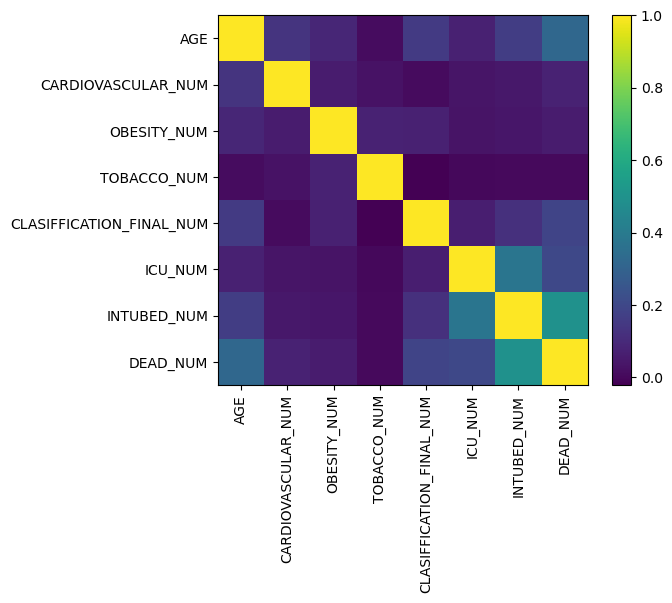

In [36]:
# Correlation diagram requires everything to be numeric.
# Ironically, this means I have to assign numbers to everything I literally just switched from numeric to string:
# This is jank but saves me from having to clean the data again
df_cleaned['CARDIOVASCULAR_NUM'] = np.where(df_cleaned['CARDIOVASCULAR']=='YES', 1, 0)
df_cleaned['OBESITY_NUM'] = np.where(df_cleaned['OBESITY']=='YES', 1, 0)
df_cleaned['TOBACCO_NUM'] = np.where(df_cleaned['TOBACCO']=='YES', 1, 0)
df_cleaned['CLASIFFICATION_FINAL_NUM'] = df_cleaned['CLASIFFICATION_FINAL'].map(
    {'COVID-1': 1, 'COVID-2': 2, 'COVID-3': 3, 'NOT COVID': 0})
df_cleaned['ICU_NUM'] = np.where(df_cleaned['ICU']=='YES', 1, 0)
df_cleaned['INTUBED_NUM'] = np.where(df_cleaned['INTUBED']=='YES', 1, 0)
df_cleaned['DEAD_NUM'] = np.where(df_cleaned['DEAD']=='YES', 1, 0)

# Now I have to select the columns to include in the correlation matrix
cols = ['AGE', 'CARDIOVASCULAR_NUM', 'OBESITY_NUM', 'TOBACCO_NUM',
         'CLASIFFICATION_FINAL_NUM', 'ICU_NUM', 'INTUBED_NUM', 'DEAD_NUM']

# Compute the correlation
corr = df_cleaned[cols].corr()

# Plot the correlation diagram
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

## TIME SERIES OF COVID DEATHS

C:\Users\brand\AppData\Local\Temp\ipykernel_107324\3196283230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DATE_DIED'] = pd.to_datetime(df_cleaned['DATE_DIED'], format='%d/%m/%Y', errors='coerce')


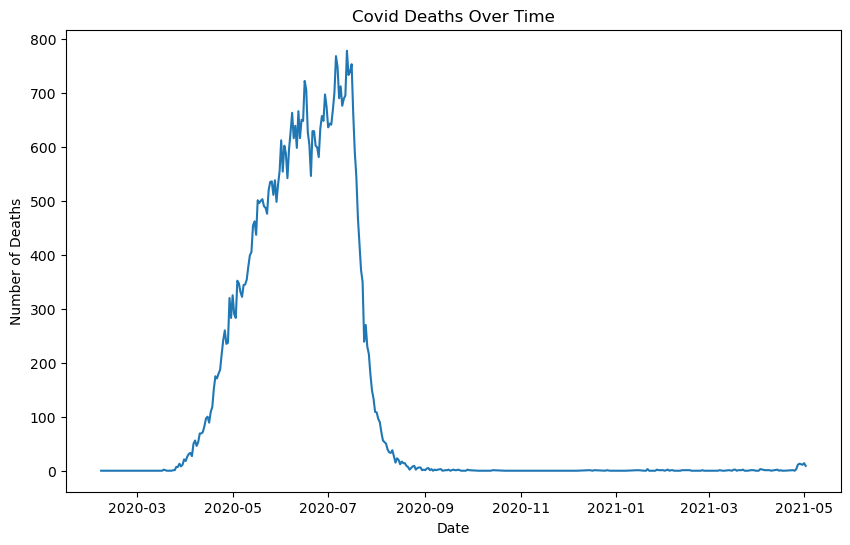

In [37]:
# Convert 'DATE_DIED' to datetime format.
df_cleaned['DATE_DIED'] = pd.to_datetime(df_cleaned['DATE_DIED'], format='%d/%m/%Y', errors='coerce')

# Filter out any 'ALIVE' cases and 'NOT COVID' cases. I want to see only covid deaths.
df_deaths = df_cleaned[(df_cleaned['DEAD'] == 'YES') & (df_cleaned['CLASIFFICATION_FINAL'] != 'NOT COVID')]

# Count the number of deaths for each date.
death_counts = df_deaths['DATE_DIED'].value_counts().sort_index()

# Plot the line graph.
plt.figure(figsize=(10, 6))
plt.plot(death_counts)
plt.title('Covid Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

## INDEPENDENT VARIABLE ANALYSIS
I will be looking at Obesity, Cardiovascular, Tobacco, and their impacts on covid severity, ICU Admission, Intubation, and Death.
Since ICU Admission and Intubation will be considered, I need to use the heavily cleaned dataframe. I also need to sort out any cases that are not covid, and reference only this new dataframe.

In [38]:
# Filter out 'NOT COVID' cases
df_filtered = df_cleaned_heavily[df_cleaned_heavily['CLASIFFICATION_FINAL'] != 'NOT COVID']

## OBESITY ANALYSIS

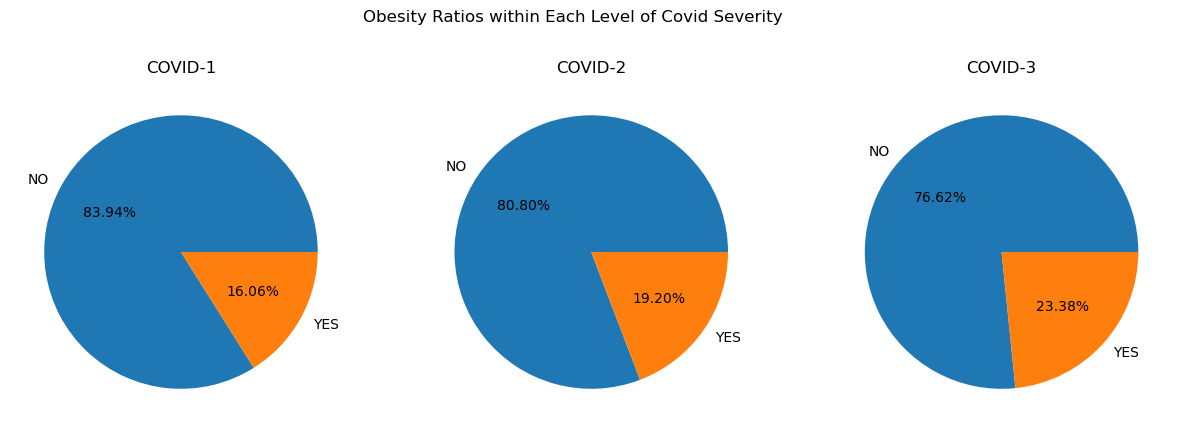

In [39]:
# Create a cross-tabulation of the two columns
# NOTE (I USED AN AI TO FIGURE OUT HOW TO CROSSTAB)
ct = pd.crosstab(df_filtered['CLASIFFICATION_FINAL'], df_filtered['OBESITY'])

# Plot pie charts for each level of COVID severity
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (ax, (severity, row)) in enumerate(zip(axs, ct.iterrows())):
    ax.pie(row, labels=row.index, autopct='%1.2f%%')
    ax.set_title(severity)

plt.suptitle('Obesity Ratios within Each Level of Covid Severity')
plt.show()

It looks like the obesity rate is larger for greater covid severity levels (assuming Covid-3 means most severe covid)

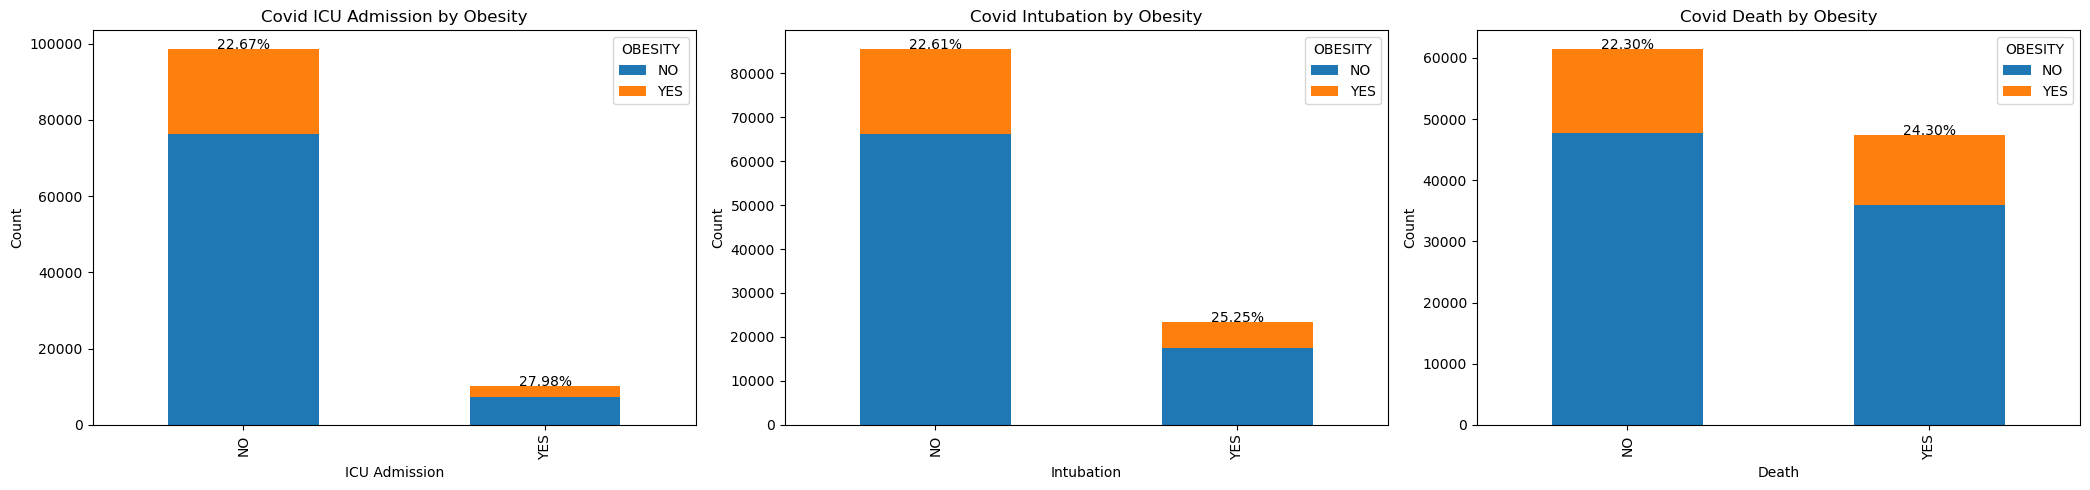

In [40]:
# Create cross-tabulations of the columns
ct_obese_icu = pd.crosstab(df_filtered['ICU'], df_filtered['OBESITY'])
ct_obese_intubed = pd.crosstab(df_filtered['INTUBED'], df_filtered['OBESITY'])
ct_obese_dead = pd.crosstab(df_filtered['DEAD'], df_filtered['OBESITY'])

# Calculate the obesity ratios (needed to plot onto the graphs later)
icu_obesity_ratio = ct_obese_icu['YES'] / (ct_obese_icu['YES'] + ct_obese_icu['NO'])
intubed_obesity_ratio = ct_obese_intubed['YES'] / (ct_obese_intubed['YES'] + ct_obese_intubed['NO'])
death_obesity_ratio = ct_obese_dead['YES'] / (ct_obese_dead['YES'] + ct_obese_dead['NO'])

# Plot the stacked bar charts
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

ct_obese_icu.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Covid ICU Admission by Obesity')
axs[0].set_xlabel('ICU Admission')
axs[0].set_ylabel('Count')

ct_obese_intubed.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Covid Intubation by Obesity')
axs[1].set_xlabel('Intubation')
axs[1].set_ylabel('Count')

ct_obese_dead.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Covid Death by Obesity')
axs[2].set_xlabel('Death')
axs[2].set_ylabel('Count')

# Add the obesity ratios above each bar
for i, ratio in enumerate(icu_obesity_ratio):
    axs[0].text(i, ct_obese_icu.iloc[i].sum(), f'{ratio:.2%}', ha='center')

for i, ratio in enumerate(intubed_obesity_ratio):
    axs[1].text(i, ct_obese_intubed.iloc[i].sum(), f'{ratio:.2%}', ha='center')

for i, ratio in enumerate(death_obesity_ratio):
    axs[2].text(i, ct_obese_dead.iloc[i].sum(), f'{ratio:.2%}', ha='center')

plt.tight_layout()
plt.show()

It seems that there is a slightly greater obesity rate for those in the ICU with, those intubated because of, and those who have died from, covid.

NOTE: These two visuals combined took forever to figure out and finalize, and I had an AI help me out in a few places, but then it was just rinse and repeat for the remaining variables

## CARDIOVASCULAR ANALYSIS

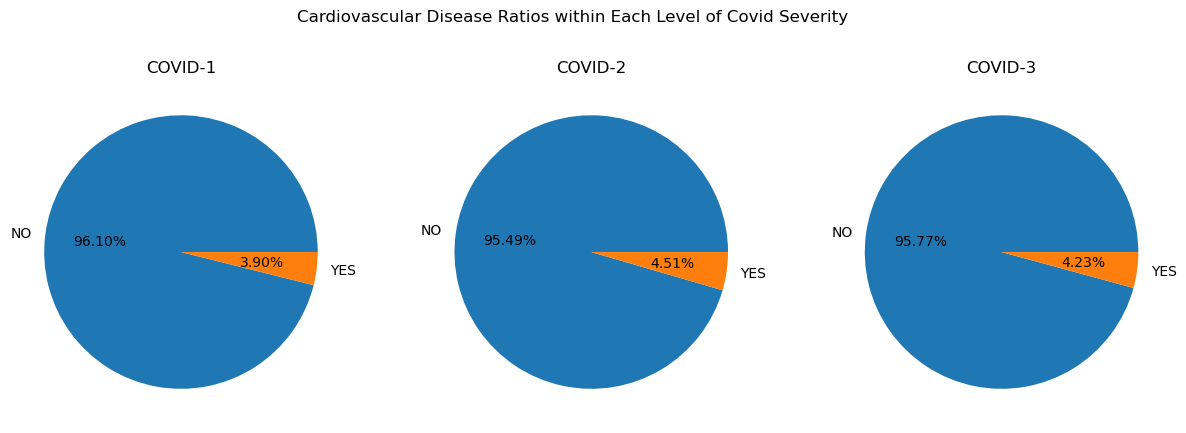

In [41]:
# Create a cross-tabulation of the two columns
ct = pd.crosstab(df_filtered['CLASIFFICATION_FINAL'], df_filtered['CARDIOVASCULAR'])

# Plot pie charts for each level of COVID severity
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (ax, (severity, row)) in enumerate(zip(axs, ct.iterrows())):
    ax.pie(row, labels=row.index, autopct='%1.2f%%')
    ax.set_title(severity)

plt.suptitle('Cardiovascular Disease Ratios within Each Level of Covid Severity')
plt.show()

There does not appear to be a correlation between cardiovascular disease and covid severity

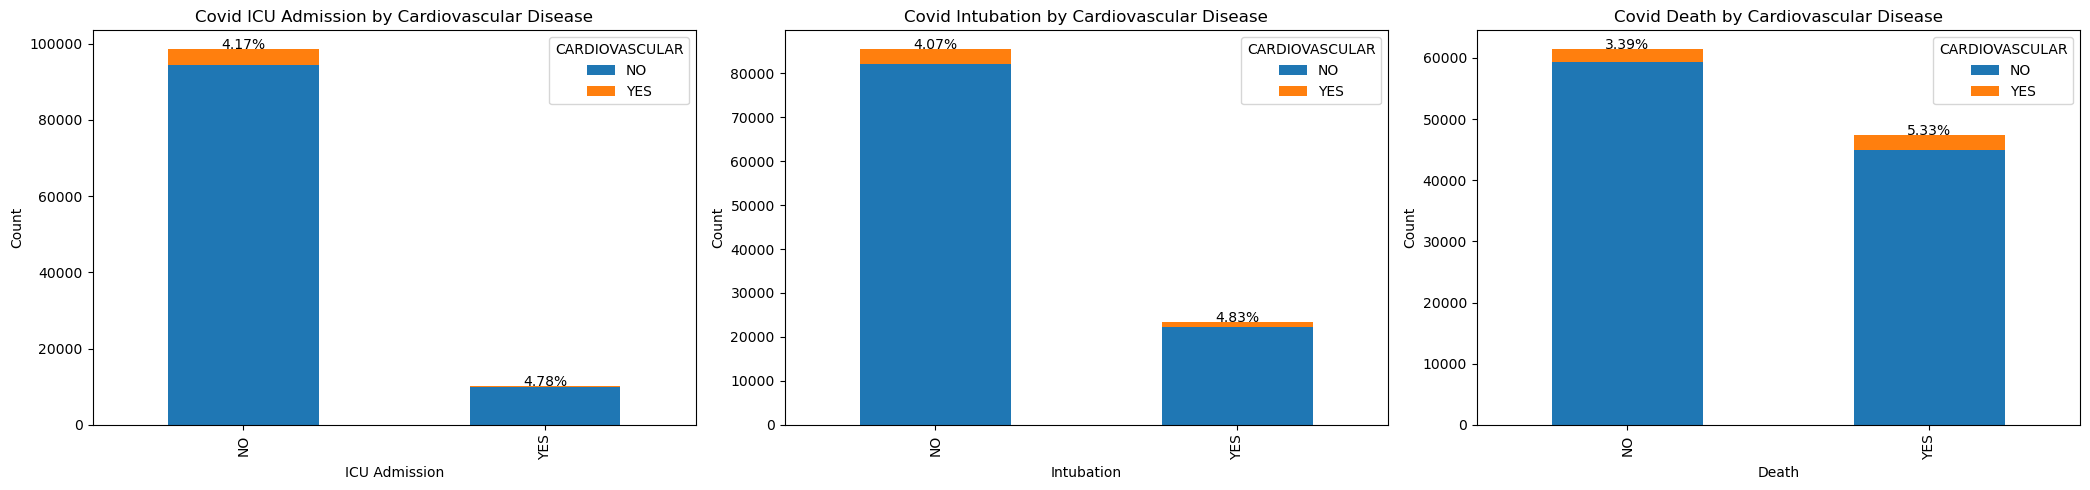

In [42]:
# Create cross-tabulations of the columns
ct_cardio_icu = pd.crosstab(df_filtered['ICU'], df_filtered['CARDIOVASCULAR'])
ct_cardio_intubed = pd.crosstab(df_filtered['INTUBED'], df_filtered['CARDIOVASCULAR'])
ct_cardio_dead = pd.crosstab(df_filtered['DEAD'], df_filtered['CARDIOVASCULAR'])

# Calculate the cardiovascular ratios (needed to plot onto the graphs later)
icu_cardio_ratio = ct_cardio_icu['YES'] / (ct_cardio_icu['YES'] + ct_cardio_icu['NO'])
intubed_cardio_ratio = ct_cardio_intubed['YES'] / (ct_cardio_intubed['YES'] + ct_cardio_intubed['NO'])
death_cardio_ratio = ct_cardio_dead['YES'] / (ct_cardio_dead['YES'] + ct_cardio_dead['NO'])

# Plot the stacked bar charts
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

ct_cardio_icu.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Covid ICU Admission by Cardiovascular Disease')
axs[0].set_xlabel('ICU Admission')
axs[0].set_ylabel('Count')

ct_cardio_intubed.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Covid Intubation by Cardiovascular Disease')
axs[1].set_xlabel('Intubation')
axs[1].set_ylabel('Count')

ct_cardio_dead.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Covid Death by Cardiovascular Disease')
axs[2].set_xlabel('Death')
axs[2].set_ylabel('Count')

# Add the cardiovascular ratios above each bar
for i, ratio in enumerate(icu_cardio_ratio):
    axs[0].text(i, ct_cardio_icu.iloc[i].sum(), f'{ratio:.2%}', ha='center')

for i, ratio in enumerate(intubed_cardio_ratio):
    axs[1].text(i, ct_cardio_intubed.iloc[i].sum(), f'{ratio:.2%}', ha='center')

for i, ratio in enumerate(death_cardio_ratio):
    axs[2].text(i, ct_cardio_dead.iloc[i].sum(), f'{ratio:.2%}', ha='center')

plt.tight_layout()
plt.show()

It seems that there is a VERY slightly greater cardiovascular disease rate for those in the ICU with, those intubated because of, and those who have died from, covid.

## TOBACCO ANALYSIS

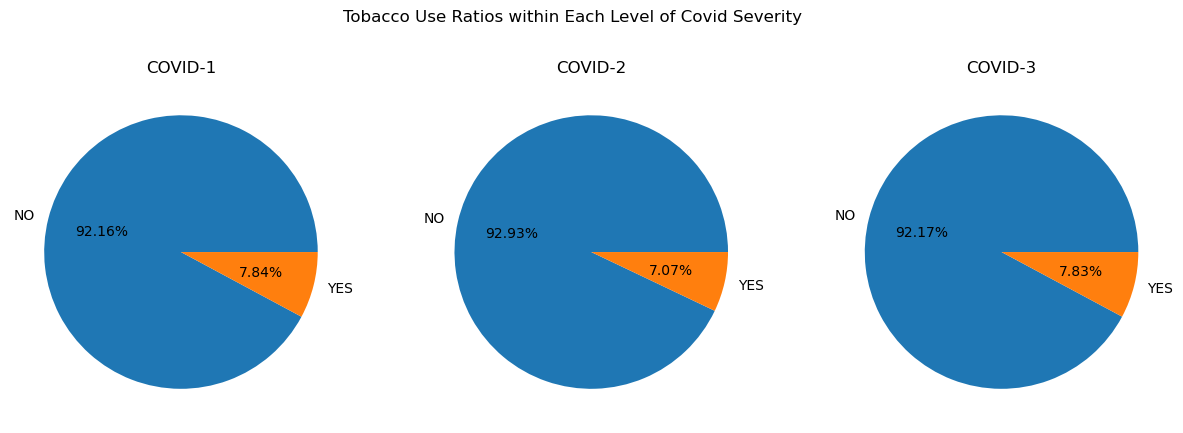

In [43]:
# Create a cross-tabulation of the two columns
ct = pd.crosstab(df_filtered['CLASIFFICATION_FINAL'], df_filtered['TOBACCO'])

# Plot pie charts for each level of COVID severity
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (ax, (severity, row)) in enumerate(zip(axs, ct.iterrows())):
    ax.pie(row, labels=row.index, autopct='%1.2f%%')
    ax.set_title(severity)

plt.suptitle('Tobacco Use Ratios within Each Level of Covid Severity')
plt.show()

There does not appear to be correlation between tobacco use and covid severity

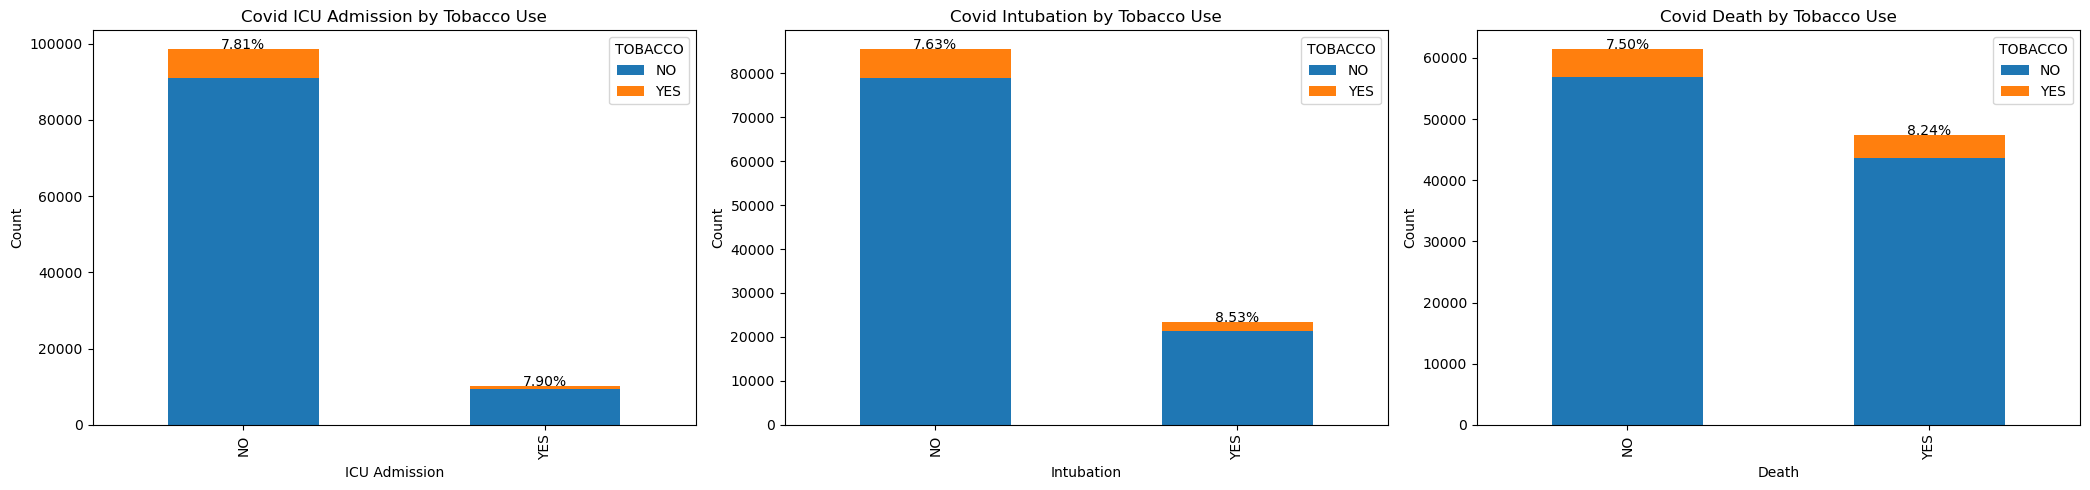

In [44]:
# Create cross-tabulations of the columns
ct_tobacco_icu = pd.crosstab(df_filtered['ICU'], df_filtered['TOBACCO'])
ct_tobacco_intubed = pd.crosstab(df_filtered['INTUBED'], df_filtered['TOBACCO'])
ct_tobacco_dead = pd.crosstab(df_filtered['DEAD'], df_filtered['TOBACCO'])

# Calculate the tobacco ratios (needed to plot onto the graphs later)
icu_tobacco_ratio = ct_tobacco_icu['YES'] / (ct_tobacco_icu['YES'] + ct_tobacco_icu['NO'])
intubed_tobacco_ratio = ct_tobacco_intubed['YES'] / (ct_tobacco_intubed['YES'] + ct_tobacco_intubed['NO'])
death_tobacco_ratio = ct_tobacco_dead['YES'] / (ct_tobacco_dead['YES'] + ct_tobacco_dead['NO'])

# Plot the stacked bar charts
fig, axs = plt.subplots(1, 3, figsize=(21, 5))

ct_tobacco_icu.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Covid ICU Admission by Tobacco Use')
axs[0].set_xlabel('ICU Admission')
axs[0].set_ylabel('Count')

ct_tobacco_intubed.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Covid Intubation by Tobacco Use')
axs[1].set_xlabel('Intubation')
axs[1].set_ylabel('Count')

ct_tobacco_dead.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Covid Death by Tobacco Use')
axs[2].set_xlabel('Death')
axs[2].set_ylabel('Count')

# Add the tobacco use ratios above each bar
for i, ratio in enumerate(icu_tobacco_ratio):
    axs[0].text(i, ct_tobacco_icu.iloc[i].sum(), f'{ratio:.2%}', ha='center')

for i, ratio in enumerate(intubed_tobacco_ratio):
    axs[1].text(i, ct_tobacco_intubed.iloc[i].sum(), f'{ratio:.2%}', ha='center')

for i, ratio in enumerate(death_tobacco_ratio):
    axs[2].text(i, ct_tobacco_dead.iloc[i].sum(), f'{ratio:.2%}', ha='center')

plt.tight_layout()
plt.show()

It seems that there is a VERY slightly greater rate of tobacco users among those in the ICU with, those intubated because of, and those who have died from, covid.

## AGE DISTRIBUTION ANALYSIS

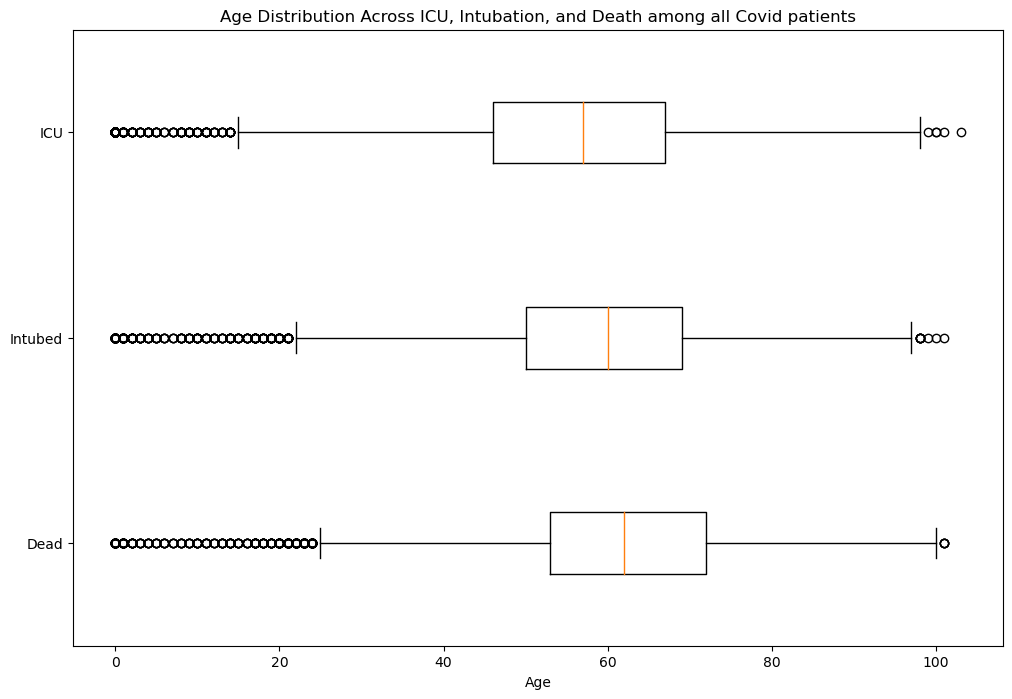

In [45]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

df_icu = df_filtered[df_filtered['ICU'] == 'YES']
df_intubed = df_filtered[df_filtered['INTUBED'] == 'YES']
df_dead = df_filtered[df_filtered['DEAD'] == 'YES']

# Create a list of ages for each category
ages = [df_dead['AGE'], df_intubed['AGE'], df_icu['AGE']]

# Create a boxplot for each category
ax.boxplot(ages, vert=False)

# Set the y-axis labels
ax.set_yticklabels(['Dead', 'Intubed', 'ICU'])

# Set the x-axis label and the title
ax.set_xlabel('Age')
ax.set_title('Age Distribution Across ICU, Intubation, and Death among all Covid patients')

# Show the plot
plt.show()

It seems that the average age distribution for those in the ICU with, those who were intubated as a result of, and those who have died from covid, increases depending on severity of category (ICU, then Intubed, then Dead)

-------------------------------------------------------------------------------------------------------------------------
## SANDBOX 
(my boredom zone. To be used while I'm testing visuals, none of this goes into final presentation unless I decide I need more visuals)

<Axes: title={'center': 'Tobacco Use Rate'}, xlabel='TOBACCO'>

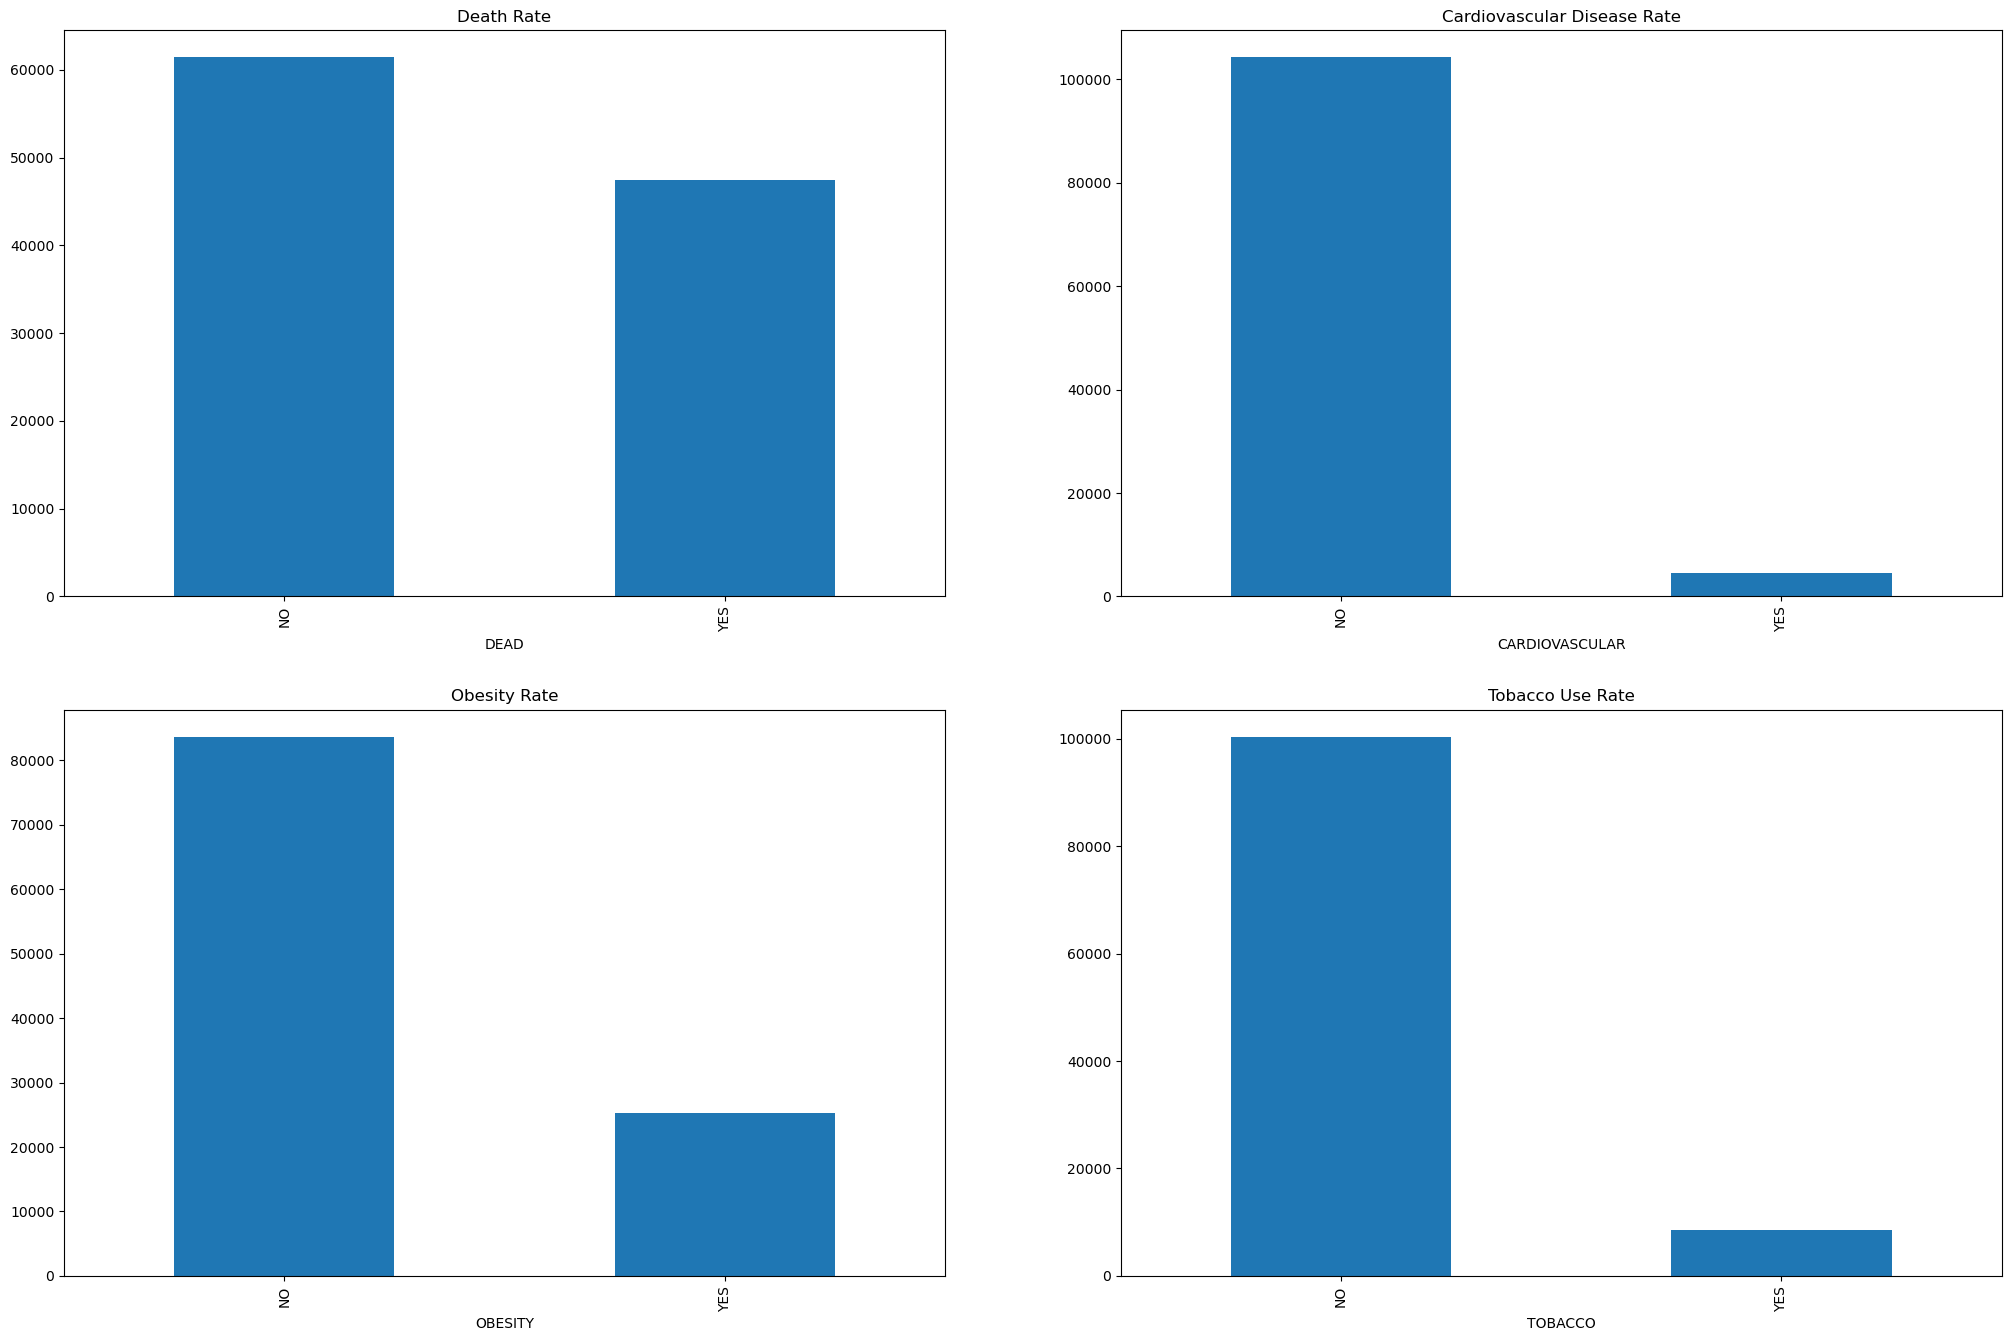

In [46]:
# Set up a grid of plots
fig = plt.figure(figsize=(25,25)) 
fig_dims = (3, 2)

# plot
plt.subplot2grid(fig_dims, (0, 0))
df_filtered['DEAD'].value_counts().plot(kind='bar', 
                                     title='Death Rate')
plt.subplot2grid(fig_dims, (0, 1))
df_filtered['CARDIOVASCULAR'].value_counts().plot(kind='bar', 
                                     title='Cardiovascular Disease Rate')
plt.subplot2grid(fig_dims, (1, 0))
df_filtered['OBESITY'].value_counts().plot(kind='bar', 
                                     title='Obesity Rate')
plt.subplot2grid(fig_dims, (1, 1))
df_filtered['TOBACCO'].value_counts().plot(kind='bar', 
                                     title='Tobacco Use Rate')

#NOTE I pulled this almost directly from:
#https://stackoverflow.com/questions/43816122/how-to-represent-boolean-data-in-graph

# this is kinda basic and kinda shit, may not use it

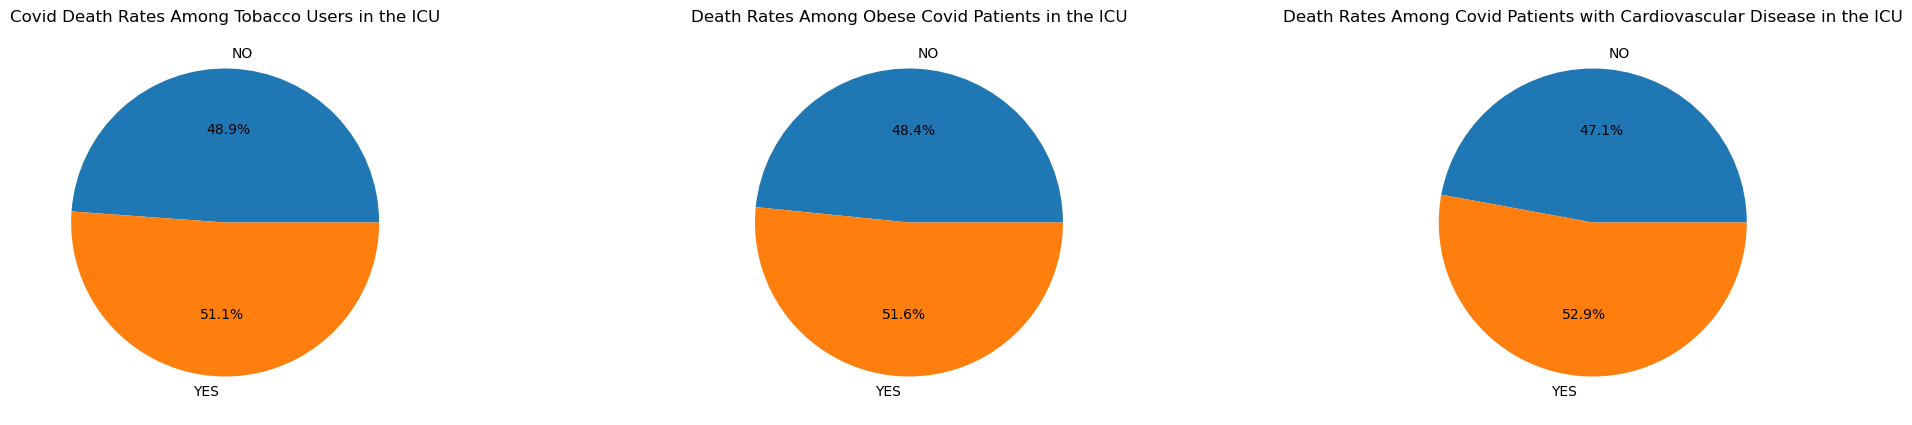

In [47]:
# Filter the DataFrame to only include rows where 'ICU' is 'YES'
df_icu = df_filtered[df_filtered['ICU'] == 'YES']

# Create cross-tabulations of the columns
ct_dead_tobacco = pd.crosstab(df_icu['DEAD'], df_icu['TOBACCO'])
ct_dead_obesity = pd.crosstab(df_icu['DEAD'], df_icu['OBESITY'])
ct_dead_cardiovascular = pd.crosstab(df_icu['DEAD'], df_icu['CARDIOVASCULAR'])

# Calculate the death rates
death_rate_tobacco = ct_dead_tobacco.loc['YES'] / ct_dead_tobacco.sum()
death_rate_obesity = ct_dead_obesity.loc['YES'] / ct_dead_obesity.sum()
death_rate_cardiovascular = ct_dead_cardiovascular.loc['YES'] / ct_dead_cardiovascular.sum()

# Plot the pie charts
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

axs[0].pie(death_rate_tobacco.values, labels=death_rate_tobacco.index, autopct='%1.1f%%')
axs[0].set_title('Covid Death Rates Among Tobacco Users in the ICU')

axs[1].pie(death_rate_obesity.values, labels=death_rate_obesity.index, autopct='%1.1f%%')
axs[1].set_title('Death Rates Among Obese Covid Patients in the ICU')

axs[2].pie(death_rate_cardiovascular.values, labels=death_rate_cardiovascular.index, autopct='%1.1f%%')
axs[2].set_title('Death Rates Among Covid Patients with Cardiovascular Disease in the ICU')

plt.show()

# this is kinda shit too